In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from seirsplus.VL_progression import _get_vl_with_plateau, gen_vl_distribution_with_plateau

Text(0, 0.5, 'log10 viral load (copies/mL)')

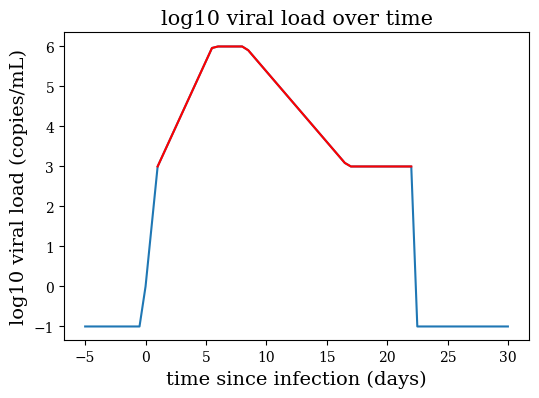

In [3]:
VL_PARAMS = {
        "half_peak": (1,1),
        "start_peak": (3,5), 
        "dt_peak": (1, 3), 
        "dt_decay": (7, 10), 
        "dt_tail": (5, 6), 
        "peak_height": (6, 6),
        "tail_height": (3, 3)
    }

critical_time_points = [np.random.uniform(bounds[0], bounds[1])
        for bounds in list(VL_PARAMS.values())[:5]]
# if we are sampling time intervals rather than time points, convert to time points
for i in range(1,5):
    critical_time_points[i] += critical_time_points[i-1]
peak_plateau_height = np.random.uniform(
    VL_PARAMS["peak_height"][0], VL_PARAMS["peak_height"][1]
)
tail_plateau_height = np.random.uniform(
    VL_PARAMS["tail_height"][0], VL_PARAMS["tail_height"][1]
)


vls = []
sample_times = np.linspace(0, 30, 61)
pre_sample_times = np.linspace(-5, 0, 10, endpoint=False)
pre_sample_vls = np.ones(10)*-1

for sample_time in sample_times:
    vls.append(_get_vl_with_plateau(
        critical_time_points,
        peak_plateau_height,
        tail_plateau_height,
        sample_time
    ))

plt.rcParams["font.family"] = 'serif'

all_times = np.concatenate((pre_sample_times, sample_times))
all_vls = np.concatenate((pre_sample_vls, vls))

vl_masked = np.ma.masked_where(all_vls < 3, all_vls)
time_masked = np.ma.masked_where(all_vls < 3, all_times)

plt.figure(figsize=[6, 4])

plt.plot(all_times, all_vls)
plt.plot(time_masked, vl_masked, color="r")

plt.title("log10 viral load over time", fontsize=15)
plt.xlabel("time since infection (days)", fontsize=14)
plt.ylabel("log10 viral load (copies/mL)", fontsize=14)
# plt.savefig(f'../figures/VL.pdf', bbox_inches='tight')